In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [43]:
df = pd.read_csv("liver_disease.csv")
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkphos,SGPT,SGOT,Albumin,A/G Ratio,Dataset
0,72,Female,15.0,7.0,720,75,80,2.5,0.3,Liver Disease
1,58,Male,1.0,0.4,182,14,20,4.2,1.0,Healthy
2,50,Male,0.9,0.2,180,18,21,4.8,1.2,Healthy
3,45,Female,0.8,0.2,195,22,25,4.0,1.1,Healthy
4,72,Female,15.0,7.0,720,75,80,2.5,0.3,Liver Disease


In [44]:
df.isnull().sum()

Age                 0
Gender              0
Total_Bilirubin     0
Direct_Bilirubin    0
Alkphos             0
SGPT                0
SGOT                0
Albumin             0
A/G Ratio           0
Dataset             0
dtype: int64

In [45]:
df.Gender.replace({"Female":0,"Male":1},inplace=True)

In [46]:
df.Dataset.value_counts()
# There is no class imbalance

Dataset
Healthy          510
Liver Disease    490
Name: count, dtype: int64

In [47]:
df.Dataset.replace({"Healthy":0,"Liver Disease":1},inplace=True)

In [48]:
df.head(10)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkphos,SGPT,SGOT,Albumin,A/G Ratio,Dataset
0,72,0,15.0,7.0,720,75,80,2.5,0.3,1
1,58,1,1.0,0.4,182,14,20,4.2,1.0,0
2,50,1,0.9,0.2,180,18,21,4.8,1.2,0
3,45,0,0.8,0.2,195,22,25,4.0,1.1,0
4,72,0,15.0,7.0,720,75,80,2.5,0.3,1
5,38,1,3.6,1.5,330,40,50,3.6,0.8,1
6,62,1,7.3,4.1,490,60,68,3.2,0.5,1
7,72,0,15.0,7.0,720,75,80,2.5,0.3,1
8,50,1,0.9,0.2,180,18,21,4.8,1.2,0
9,45,0,0.8,0.2,195,22,25,4.0,1.1,0


In [92]:
df.tail(10)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkphos,SGPT,SGOT,Albumin,A/G Ratio,Dataset
990,50,1,0.9,0.2,180,18,21,4.8,1.2,0
991,34,1,2.5,1.3,210,30,35,3.9,0.9,1
992,34,1,2.5,1.3,210,30,35,3.9,0.9,1
993,50,1,0.9,0.2,180,18,21,4.8,1.2,0
994,72,0,15.0,7.0,720,75,80,2.5,0.3,1
995,38,1,3.6,1.5,330,40,50,3.6,0.8,1
996,38,1,3.6,1.5,330,40,50,3.6,0.8,1
997,50,1,0.9,0.2,180,18,21,4.8,1.2,0
998,62,1,10.9,5.5,699,64,100,3.3,0.4,1
999,60,0,1.2,0.3,190,20,19,4.5,1.0,0


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1000 non-null   int64  
 1   Gender            1000 non-null   int64  
 2   Total_Bilirubin   1000 non-null   float64
 3   Direct_Bilirubin  1000 non-null   float64
 4   Alkphos           1000 non-null   int64  
 5   SGPT              1000 non-null   int64  
 6   SGOT              1000 non-null   int64  
 7   Albumin           1000 non-null   float64
 8   A/G Ratio         1000 non-null   float64
 9   Dataset           1000 non-null   int64  
dtypes: float64(4), int64(6)
memory usage: 78.3 KB


In [50]:
df.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkphos,SGPT,SGOT,Albumin,A/G Ratio,Dataset
count,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.00000
mean,54.461000,0.590000,4.204300,1.9689,330.396000,35.3000,42.518000,4.135200,0.817300,0.49000
std,11.740968,0.492079,4.651633,2.3517,200.730994,21.1162,27.165339,1.157299,0.285714,0.50015
min,34.000000,0.000000,0.700000,0.1000,180.000000,14.0000,18.000000,2.500000,0.300000,0.00000
25%,45.000000,0.000000,0.900000,0.2000,187.000000,18.0000,20.000000,3.300000,0.500000,0.00000
50%,58.000000,1.000000,1.200000,0.4000,195.000000,22.0000,25.000000,4.000000,0.900000,0.00000
75%,62.000000,1.000000,7.300000,4.1000,490.000000,60.0000,68.000000,4.500000,1.000000,1.00000
max,72.000000,1.000000,15.000000,7.0000,720.000000,75.0000,100.000000,6.800000,1.200000,1.00000


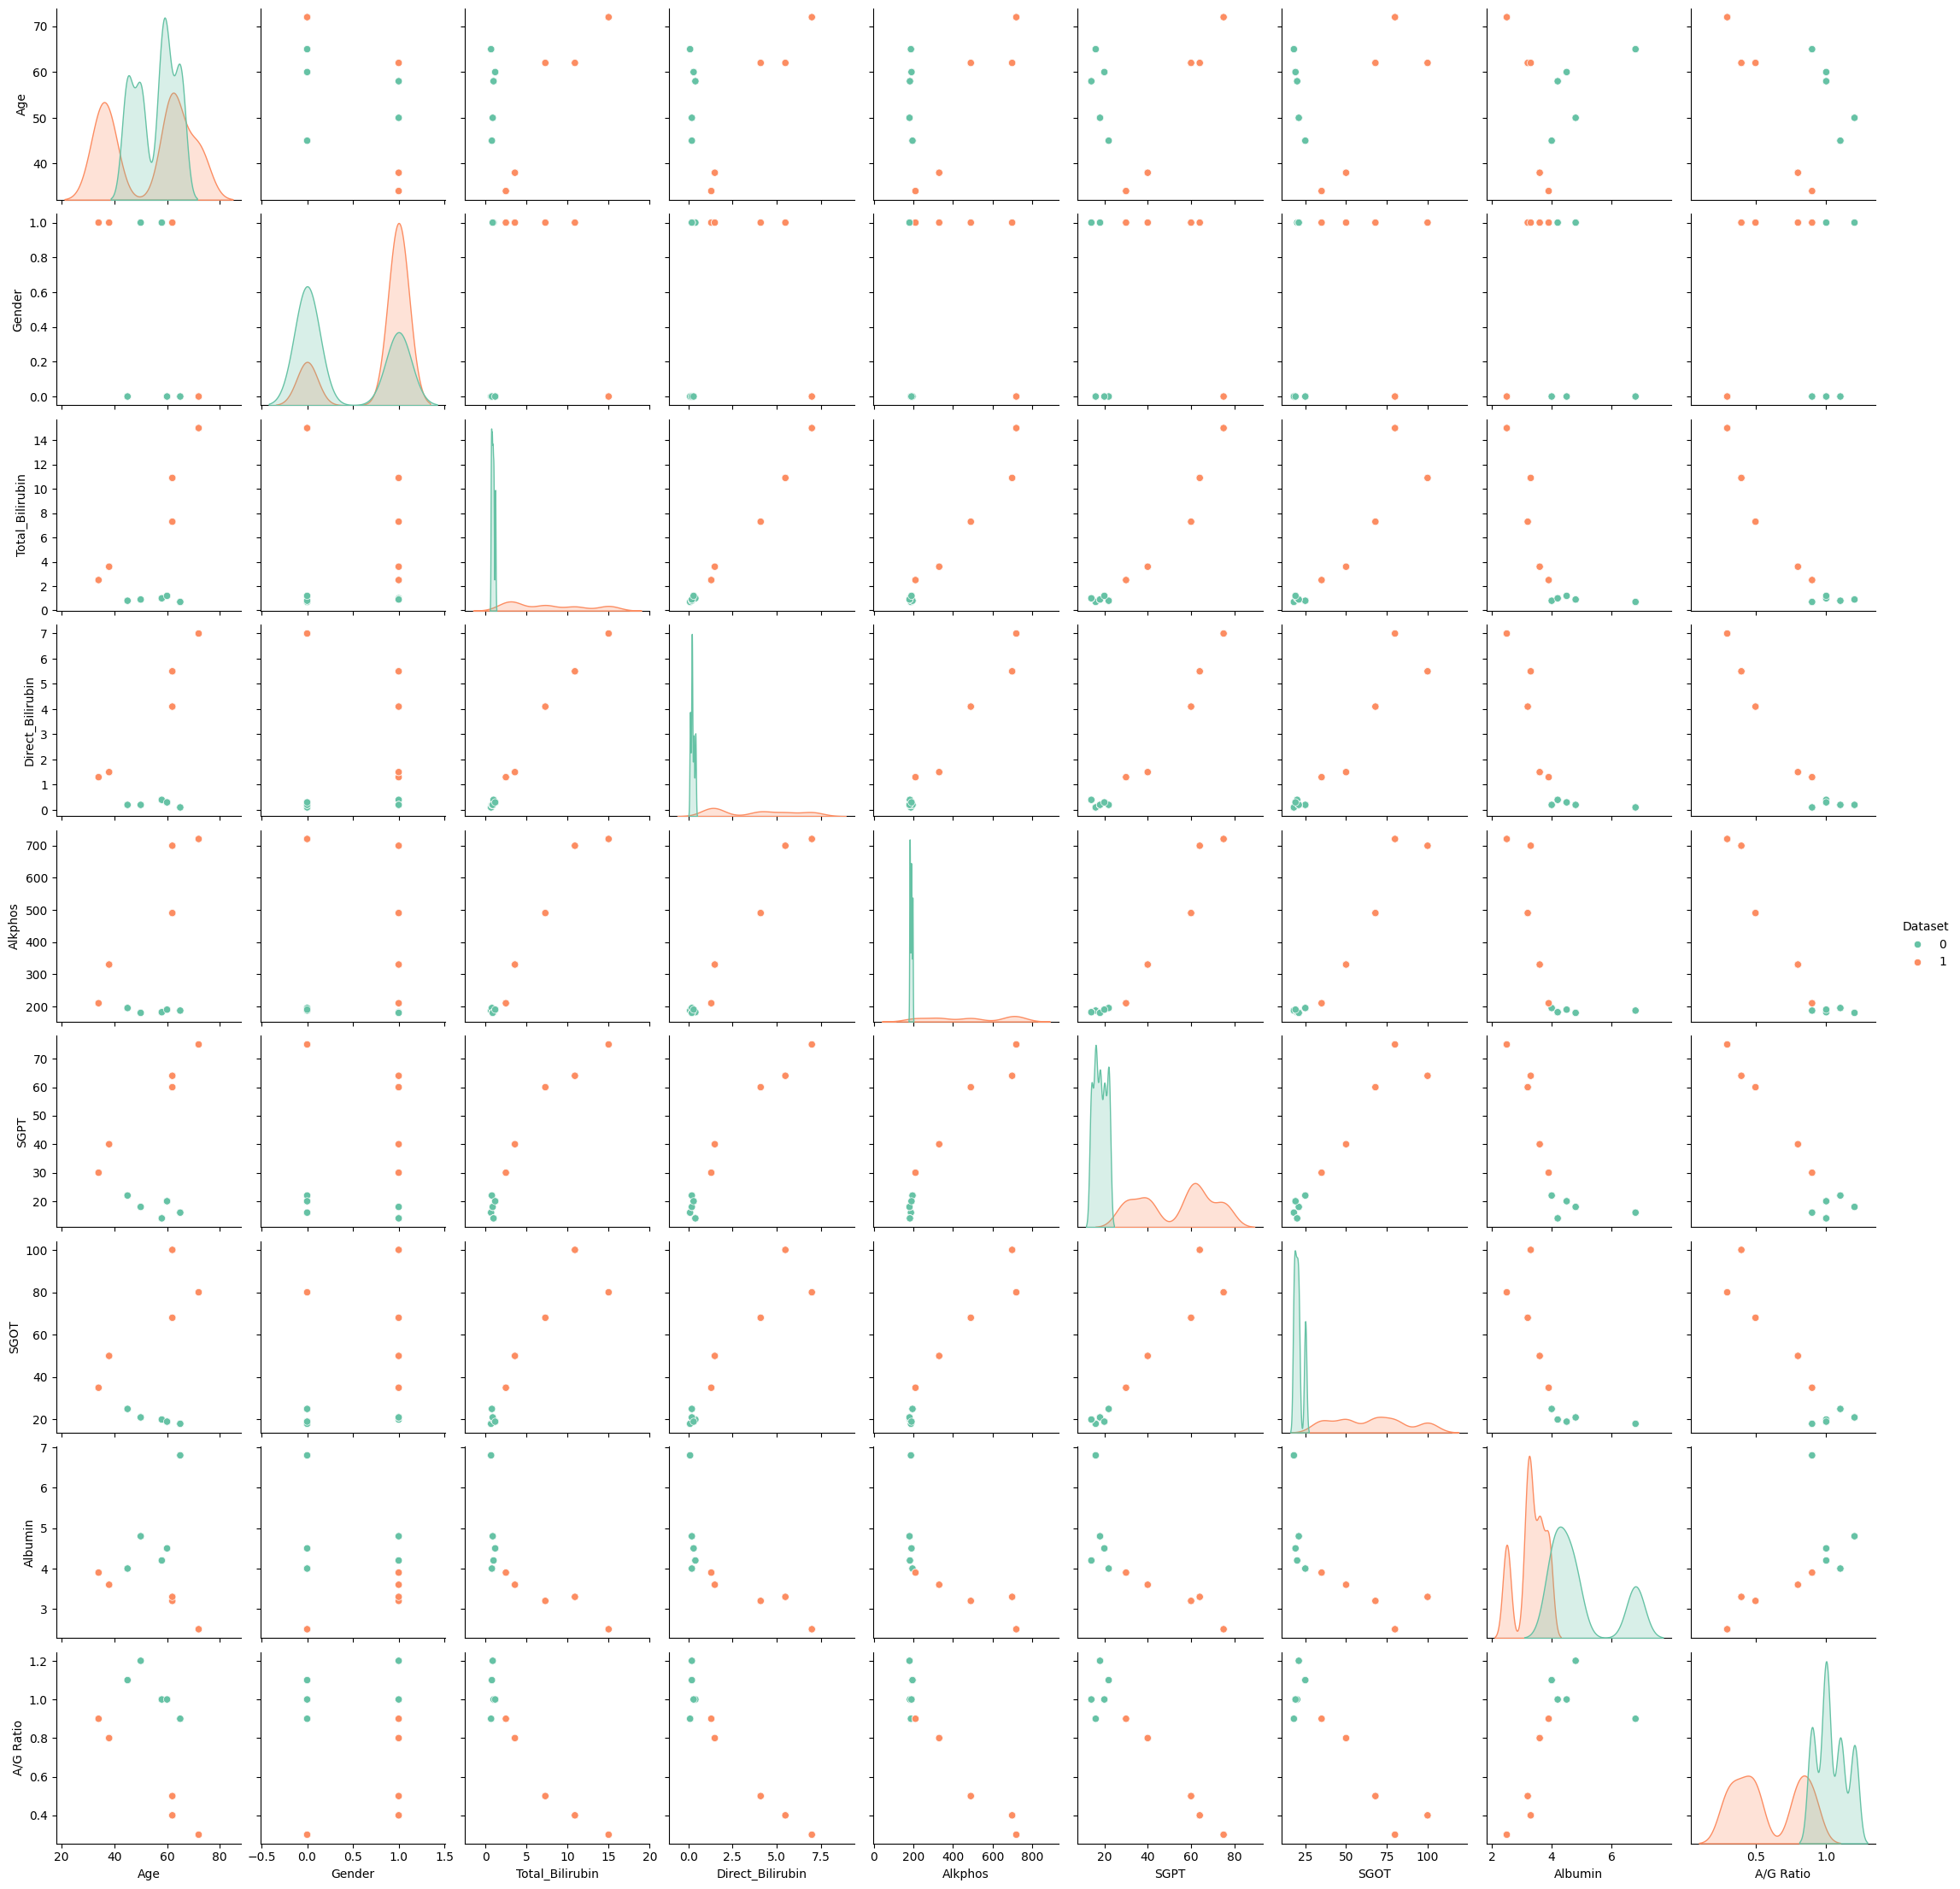

In [51]:
sns.pairplot(df, vars=["Age","Gender","Total_Bilirubin","Direct_Bilirubin","Alkphos","SGPT","SGOT","Albumin","A/G Ratio"], 
             hue="Dataset", palette="Set2")
plt.show()

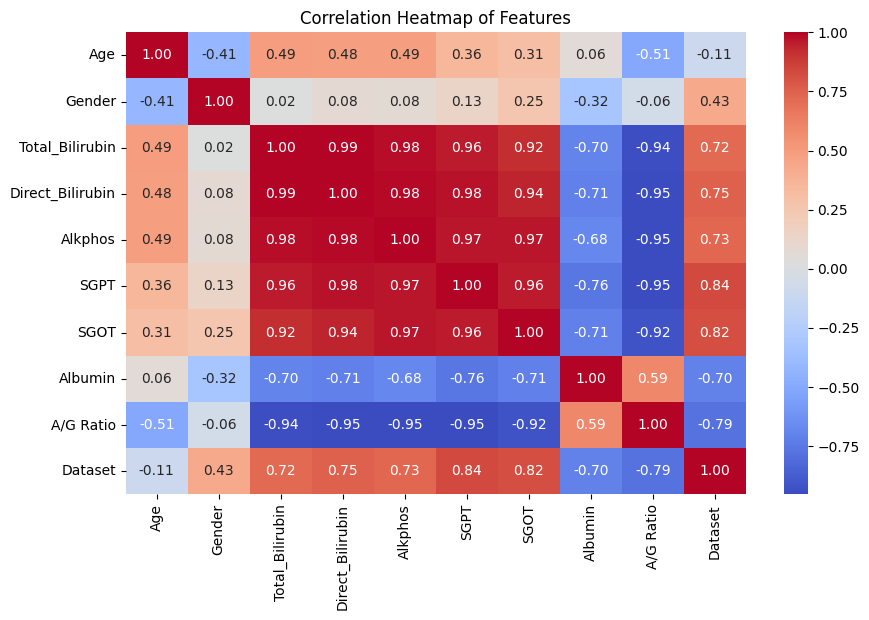

In [29]:
# Co - relation =>

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Features")
plt.show()

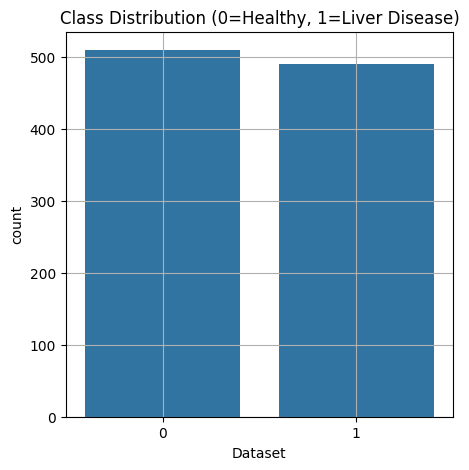

In [66]:
# Distribution of target variable =>

plt.figure(figsize=(5,5))
sns.countplot(x="Dataset", data=df)
plt.title("Class Distribution (0=Healthy, 1=Liver Disease)")
plt.grid()
plt.show()

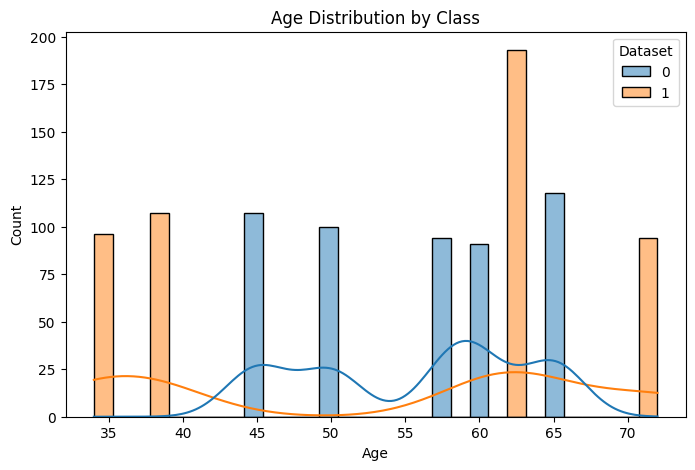

In [67]:
# Age distribution by class =>

plt.figure(figsize=(8,5))
sns.histplot(data=df, x="Age", hue="Dataset", kde=True, bins=30)
plt.title("Age Distribution by Class")
plt.show()

Text(0.5, 0, 'Features')

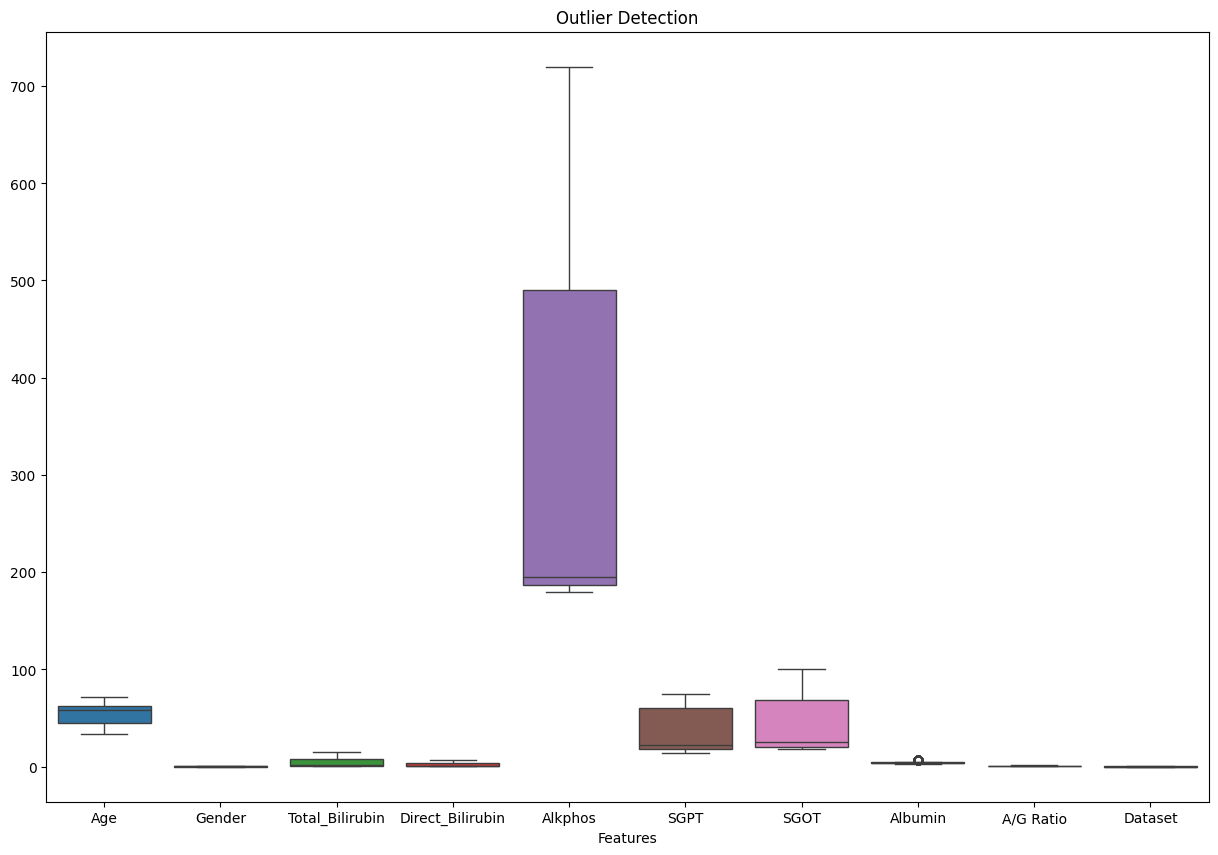

In [14]:
# Detecting Outlier =>

plt.figure(figsize=(15,10))
sns.boxplot(df)
plt.title("Outlier Detection")
plt.xlabel("Features")

In [52]:

x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [53]:
# Scale numerical features =>

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [54]:
from sklearn.model_selection import train_test_split

x_train,x_test , y_train,y_test = train_test_split(x_scaled,y,train_size=0.2,random_state=555)

array([[-0.80621411, -1.19959343, -0.73221672, ..., -0.64518855,
        -0.11688223,  0.98994698],
       [ 0.6424319 ,  0.83361577,  0.66584123, ...,  0.93850295,
        -0.80849304, -1.11110781],
       [-0.80621411, -1.19959343, -0.73221672, ..., -0.64518855,
        -0.11688223,  0.98994698],
       ...,
       [ 0.6424319 ,  0.83361577,  0.66584123, ...,  0.93850295,
        -0.80849304, -1.11110781],
       [-1.74357329,  0.83361577, -0.36657079, ..., -0.2768882 ,
        -0.20333358,  0.28959538],
       [-1.74357329,  0.83361577, -0.36657079, ..., -0.2768882 ,
        -0.20333358,  0.28959538]])

# Logistic Regression =>

In [58]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr.fit(x_train,y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [70]:
prd_y=lr.predict(x_test)
prd_y

array([1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,

In [68]:
from sklearn.metrics import *

In [73]:
print("Logistic Regression Results")
print("Accuracy:", accuracy_score(y_test,prd_y))
print(confusion_matrix(y_test,prd_y))

Logistic Regression Results
Accuracy: 1.0
[[415   0]
 [  0 385]]


In [74]:
print(classification_report(y_test,prd_y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       415
           1       1.00      1.00      1.00       385

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



In [76]:
lr.score(x_train,y_train)


1.0

In [75]:
# Cross - Validation =>

from sklearn.model_selection import cross_val_score

#5-fold cross-validation =>
cv_scores = cross_val_score(lr, x_scaled, y, cv=5, scoring='accuracy')

print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())
print("Standard Deviation:", cv_scores.std())

Cross-validation scores: [1. 1. 1. 1. 1.]
Mean CV Accuracy: 1.0
Standard Deviation: 0.0


In [81]:
#Save Model & Scaler after Training =>


import joblib

# Save trained model and scaler
joblib.dump(lr, "log_model.pkl")
joblib.dump(scaler, "scaler.pkl")
print("Model and Scaler saved successfully!")

Model and Scaler saved successfully!


In [83]:
# Testing on Unseen Data =>

sample = np.array([[50,1,0.9,0.2,180,18,21,4.8,1.2]])

# Scale
sample_scaled = scaler.transform(sample)

# Predict
pred = lr.predict(sample_scaled)
pred_prob = lr.predict_proba(sample_scaled)

print("Prediction (0=Healthy, 1=Liver Disease):", pred[0])
print("Probabilities [Healthy, Liver Disease]:", pred_prob)

Prediction (0=Healthy, 1=Liver Disease): 0
Probabilities [Healthy, Liver Disease]: [[0.96445621 0.03554379]]


In [91]:
# Saving Model =>

import joblib

# Save model and scaler
joblib.dump(lr, "log_model.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']